In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [20]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
from flask import Flask, jsonify

In [21]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")


In [22]:
# reflect an existing database into a new model
Base = automap_base()
Base.prepare(engine, reflect=True)
Base.classes.keys()
# reflect the tables


['measurement', 'station']

In [63]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [65]:
# Create our session (link) from Python to the DB
session = Session(engine)
session.query(measurement).distinct().all()


In [90]:

session.query(station).distinct().all()

# Exploratory Climate Analysis

In [78]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
precipitation_Year = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= '2016-11-23').filter(Measurement.date <= '2017-11-27').order_by(Measurement.date).all()
precipitation_Year





[('2016-11-23', 0.14),
 ('2016-11-23', 0.03),
 ('2016-11-23', None),
 ('2016-11-23', 0.03),
 ('2016-11-23', 0.25),
 ('2016-11-23', 0.22),
 ('2016-11-24', 0.05),
 ('2016-11-24', 0.2),
 ('2016-11-24', 0.21),
 ('2016-11-24', 0.3),
 ('2016-11-24', 0.72),
 ('2016-11-25', 0.05),
 ('2016-11-25', 0.05),
 ('2016-11-25', None),
 ('2016-11-25', 0.11),
 ('2016-11-25', 0.08),
 ('2016-11-25', 1.03),
 ('2016-11-26', 0.05),
 ('2016-11-26', 0.05),
 ('2016-11-26', 0.02),
 ('2016-11-26', 0.03),
 ('2016-11-26', 0.06),
 ('2016-11-26', 0.3),
 ('2016-11-27', 0.0),
 ('2016-11-27', 0.06),
 ('2016-11-27', 0.03),
 ('2016-11-27', 0.0),
 ('2016-11-27', 0.17),
 ('2016-11-27', 0.29),
 ('2016-11-28', 0.01),
 ('2016-11-28', 0.02),
 ('2016-11-28', 0.0),
 ('2016-11-28', None),
 ('2016-11-28', 0.0),
 ('2016-11-28', 0.0),
 ('2016-11-28', 0.69),
 ('2016-11-29', 0.0),
 ('2016-11-29', 0.04),
 ('2016-11-29', 0.04),
 ('2016-11-29', None),
 ('2016-11-29', 0.06),
 ('2016-11-29', 0.09),
 ('2016-11-29', 0.2),
 ('2016-11-30', 0.14)

In [83]:
# Save the query results as a Pandas DataFrame and set the index to the date column
# Sort the dataframe by date
precipitation_df = pd.DataFrame(precipitation_Year, columns=['date', 'precipitation'])
precipitation_df.set_index('date')
#sort Pandas dataframe by date
precipitation_df.sort_values(by=['date'])
precipitation_df.head()

,date,precipitation
0,2016-11-23,0.14
1,2016-11-23,0.03
2,2016-11-23,NaN
3,2016-11-23,0.03
4,2016-11-23,0.25


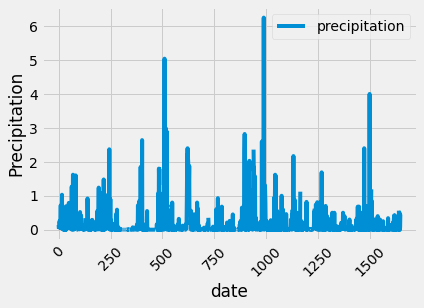

In [88]:
## Use Pandas Plotting with Matplotlib to plot the data
precipitation_df.plot(x_compat=True)

# Rotate the xticks for the dates
plt.ylabel("Precipitation")
plt.xlabel("date")
plt.xticks(rotation='45')
plt.show()

In [79]:
# Calculate the date 1 year ago from the last data point in the database


In [85]:
# Use Pandas to calcualte the summary statistics for the precipitation data
precipitation_df.describe()

,precipitation
count,1490.000000
mean,0.169450
std,0.436849
min,0.000000
25%,0.000000
50%,0.010000
75%,0.120000
max,6.250000


In [91]:
# How many stations are available in this dataset?
station_count = session.query(Station.id).count()
station_count

9

In [92]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [94]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
session.query(func.min(measurement.tobs), func.max(measurement.tobs), func.avg(measurement.tobs)).\
    filter(Measurement.station == 'USC00519281').all()

[(54.0, 85.0, 71.66378066378067)]

<function matplotlib.pyplot.show(*args, **kw)>

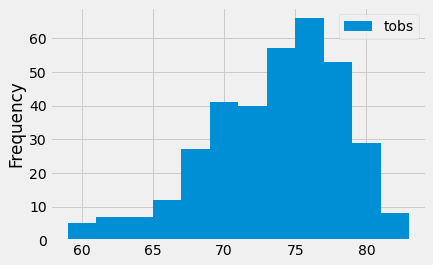

In [99]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
Station_months = session.query(Measurement.tobs).\
    filter(Measurement.station == 'USC00519281').\
    filter(Measurement.date >= '2016-08-23').all()


station_df = pd.DataFrame(Station_months, columns=['tobs'])
station_df.plot.hist(bins=12)
plt.show

In [100]:
app = Flask(__name__)

In [103]:
##List all routes that are available.##
@app.route("/")
def Home():
   # """List all available api routes."""
    return "Available Routes:<br/>/api/v1.0/names<br/>/api/v1.0/stations"

In [104]:
##/api/v1.0/precipitation##
##Convert the query results to a dictionary using date as the key and prcp as the value.##
@app.route("/api/v1.0/precipitation")
def names():
  
    session = Session(engine)

    results =  session.query(measurement.date, measurement.prcp).order_by(measurement.date).all()

    session.close()

    precipitation = []
    for precipitation, date, prcp in results:
        prec_dict = {}
        prec_dict["date"] = date
        prec_dict["prcp"] = prcp
        precipitation.append(prec_dict)

    return jsonify(precipitation)

In [108]:
@app.route("/api/v1.0/stations")
def station():
   
    session = Session(engine)

#Return a list of station data"""
   
    results = session.query(station.station, station.name).all()

    session.close()

    
    all_station = []
    for station, name in results:
        station_dict = {}
        station_dict["station"] = station
        station_dict["name"] = name
        all_station.append(station_dict)

    return jsonify(all_station)

In [109]:
@app.route("/api/v1.0/tobs")
def tobs():

    # Query 
    results = session.query(Measurement).filter(Measurement.date.in_(str_dates))

    temp_data = []
    for day in results:
        temp_dict = {}
        temp_dict[day.date] = day.tobs
        temp_data.append(temp_dict)

    return jsonify(temp_data)

In [113]:
# """Tobs: Query the dates and temperature observations of the most active station for the last year of data.""""

@app.route("/api/v1.0/tobs")
def tob():

    results = session.query(measurement).filter(measurement.date.in_(str_dates))

    temp_data = []
    for day in results:
        temp_dict = {}
        temp_dict[day.date] = day.tobs
        temp_data.append(temp_dict)

    return jsonify(temp_data)

## Bonus Challenge Assignment-

In [ ]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
